In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('DATA/fake_reg.csv')

In [4]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [5]:
X = df[['feature1','feature2']].values

In [6]:
y = df['price'].values

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
X_train

array([[1001.63407565,  998.80950388],
       [ 999.76150137,  998.41802414],
       [ 998.2638401 , 1000.92030063],
       ...,
       [1000.47386523, 1001.44542815],
       [ 998.8625673 ,  999.15662112],
       [1000.55690247,  999.35441706]])

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
scaler.fit(X_train)

MinMaxScaler()

In [12]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model = Sequential()

In [15]:
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

In [16]:
model.compile(optimizer='rmsprop',loss='mse')

In [17]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 3s 3ms/step - loss: 256926.1678
Epoch 2/250
22/22 [==============================] - 0s 3ms/step - loss: 258494.9810
Epoch 3/250
22/22 [==============================] - 0s 3ms/step - loss: 259094.9986
Epoch 4/250
22/22 [==============================] - 0s 3ms/step - loss: 253342.0543
Epoch 5/250
22/22 [==============================] - 0s 3ms/step - loss: 253056.9531
Epoch 6/250
22/22 [==============================] - 0s 4ms/step - loss: 250283.1698
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 252008.0992
Epoch 8/250
22/22 [==============================] - 0s 3ms/step - loss: 255696.2004
Epoch 9/250
22/22 [==============================] - ETA: 0s - loss: 252652.85 - ETA: 0s - loss: 253933.55 - 0s 3ms/step - loss: 254089.9463
Epoch 10/250
22/22 [==============================] - 0s 3ms/step - loss: 260650.9212
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 255375.4939
Epoch 1

22/22 [==============================] - 0s 3ms/step - loss: 3141.1097
Epoch 96/250
22/22 [==============================] - 0s 4ms/step - loss: 2620.7232
Epoch 97/250
22/22 [==============================] - 0s 3ms/step - loss: 2149.8178
Epoch 98/250
22/22 [==============================] - 0s 3ms/step - loss: 2055.2135
Epoch 99/250
22/22 [==============================] - 0s 4ms/step - loss: 1944.8354
Epoch 100/250
22/22 [==============================] - 0s 3ms/step - loss: 1827.0398
Epoch 101/250
22/22 [==============================] - 0s 3ms/step - loss: 1842.4953
Epoch 102/250
22/22 [==============================] - 0s 3ms/step - loss: 1967.4231
Epoch 103/250
22/22 [==============================] - 0s 2ms/step - loss: 1979.6460
Epoch 104/250
22/22 [==============================] - 0s 2ms/step - loss: 1870.5297
Epoch 105/250
22/22 [==============================] - 0s 3ms/step - loss: 1823.3304
Epoch 106/250
22/22 [==============================] - 0s 3ms/step - loss: 1717.180

22/22 [==============================] - 0s 4ms/step - loss: 100.5125
Epoch 192/250
22/22 [==============================] - 0s 4ms/step - loss: 92.3502
Epoch 193/250
22/22 [==============================] - 0s 5ms/step - loss: 99.1043
Epoch 194/250
22/22 [==============================] - 0s 6ms/step - loss: 90.5550
Epoch 195/250
22/22 [==============================] - 0s 6ms/step - loss: 76.5482
Epoch 196/250
22/22 [==============================] - 0s 4ms/step - loss: 73.6571
Epoch 197/250
22/22 [==============================] - 0s 4ms/step - loss: 67.1412
Epoch 198/250
22/22 [==============================] - 0s 4ms/step - loss: 59.8831
Epoch 199/250
22/22 [==============================] - 0s 4ms/step - loss: 57.1544
Epoch 200/250
22/22 [==============================] - 0s 4ms/step - loss: 56.1882
Epoch 201/250
22/22 [==============================] - 0s 4ms/step - loss: 50.7027: 0s - loss: 50.66
Epoch 202/250
22/22 [==============================] - 0s 4ms/step - loss: 48.8871

In [18]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

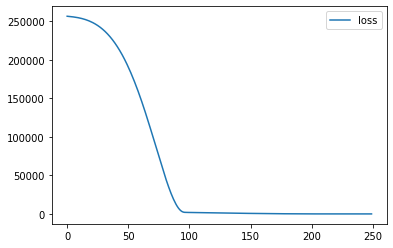

In [19]:
loss_df.plot()

In [20]:
model.evaluate(X_train,y_train,verbose=0)

23.92319679260254

In [21]:
model.evaluate(X_test,y_test,verbose=0)

25.7083740234375

In [22]:
test_prediction = model.predict(X_test)

In [23]:
test_prediction = pd.Series(test_prediction.reshape(300,))

In [24]:
test_prediction

0      405.931488
1      624.447083
2      592.981995
3      573.114563
4      367.294281
          ...    
295    529.874390
296    515.849121
297    610.532776
298    417.572021
299    411.556152
Length: 300, dtype: float32

In [25]:
df_prediction = pd.DataFrame(y_test,columns=['true_values'])

In [26]:
df_prediction

,true_values
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [27]:
df_prediction = pd.concat([df_prediction,test_prediction],axis=1)

In [28]:
df_prediction.columns = ['true_values','prediction']

In [29]:
df_prediction

,true_values,prediction
0,402.296319,405.931488
1,624.156198,624.447083
2,582.455066,592.981995
3,578.588606,573.114563
4,371.224104,367.294281
...,...,...
295,525.704657,529.874390
296,502.909473,515.849121
297,612.727910,610.532776
298,417.569725,417.572021


In [30]:
new_gem = [[998,1000]]

In [31]:
new_gem = scaler.transform(new_gem)

In [32]:
new_gem

array([[0.14117652, 0.53968792]])

In [33]:
res = model.predict(new_gem)

In [34]:
print(f"the price of this model is {res[0][0]} rupees")

the price of this model is 420.423095703125 rupees


In [35]:
from tensorflow.keras.models import load_model

In [36]:
model.save("my_gem_model.h5")

In [37]:
model = load_model("my_gem_model.h5")

In [42]:
model.predict(new_gem)

array([[420.4231]], dtype=float32)

In [43]:
model.predict(new_gem)

array([[420.4231]], dtype=float32)

In [44]:
value = scaler.transform([[498,1234]])

In [47]:
print(f'the predicted price is {model.predict(value)[0][0]}')

the predicted price is 1198.523681640625
